In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
import warnings 
warnings.filterwarnings("ignore")

In [49]:
data = pd.read_csv('data/employee_data.csv')

In [51]:
data.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [53]:
data.columns

Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')

In [55]:
# Display initial information
print("Initial DataFrame:")
print(data.head())
print("\nDataFrame Info:")
print(data.info())

Initial DataFrame:
   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB
None


In [57]:
# --- Data Cleaning ---
# 1. Clean Column Names: Remove extra spaces and replace spaces with underscores
data.columns = [col.strip().replace(" ", "_") for col in data.columns]
print("\nCleaned Column Names:", data.columns.tolist())


Cleaned Column Names: ['ID', 'Gender', 'Experience_(Years)', 'Position', 'Salary']


In [59]:
# 2. Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 ID                    0
Gender                0
Experience_(Years)    0
Position              0
Salary                0
dtype: int64


In [61]:
# 3. Convert data types if necessary (ensuring Salary and Experience columns are numeric)
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')
data['Experience_(Years)'] = pd.to_numeric(data['Experience_(Years)'], errors='coerce')

In [63]:
# Optional: Drop the ID column if it's not needed for analysis
data = data.drop('ID', axis=1)

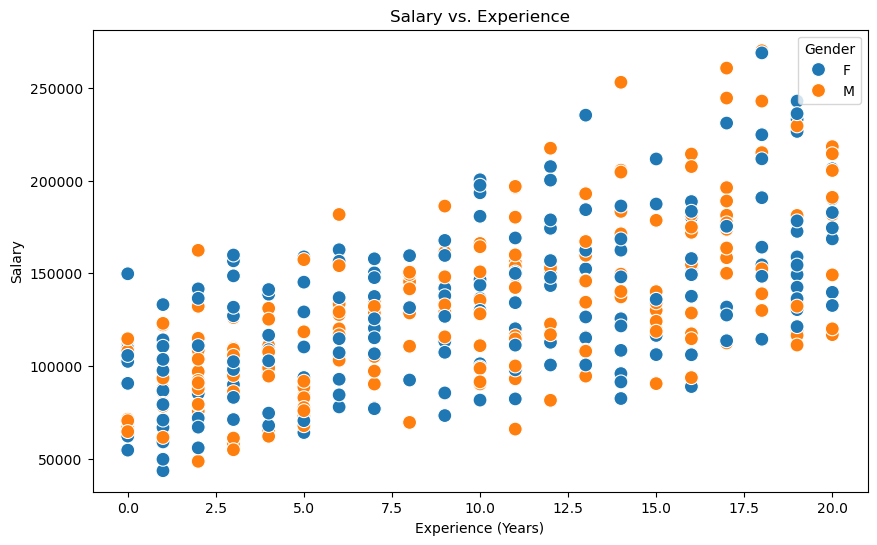

In [65]:
# --- Data Visualization ---

# 1. Scatter Plot: Salary vs Experience (colored by Gender)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Experience_(Years)', y='Salary', hue='Gender', s=100)
plt.title("Salary vs. Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.show()

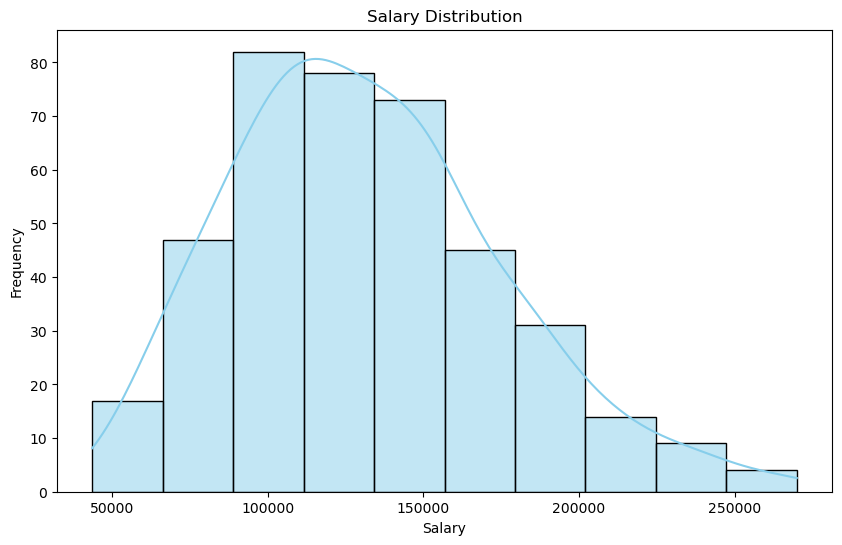

In [67]:
# 2. Histogram: Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Salary', kde=True, bins=10, color='skyblue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


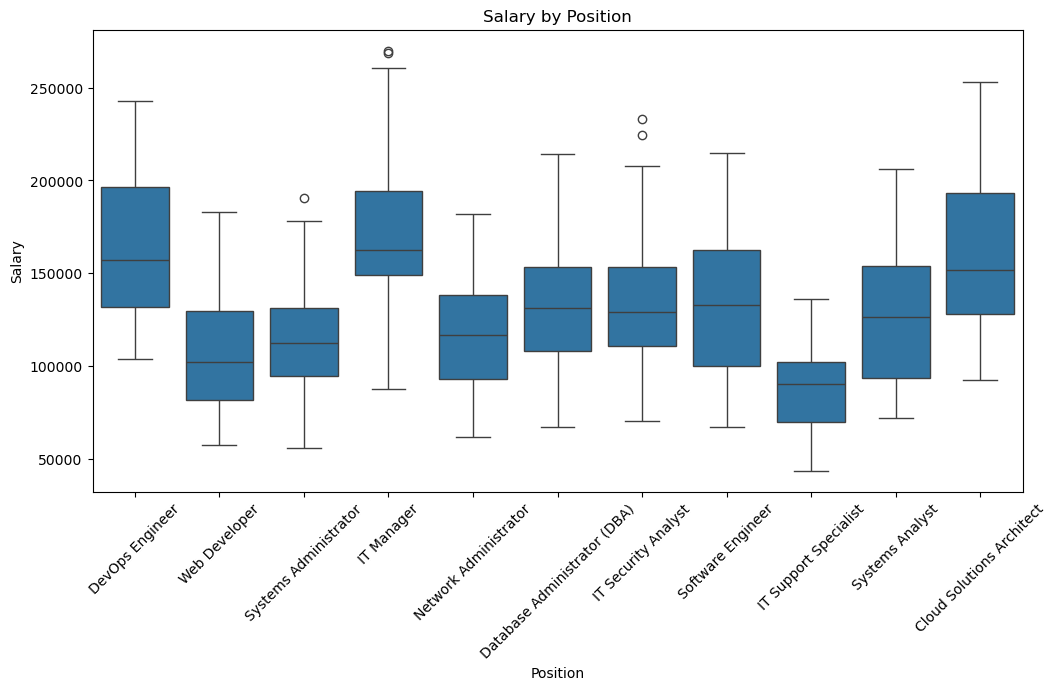

In [69]:
# 3. Boxplot: Salary by Position
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Position', y='Salary')
plt.title("Salary by Position")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()


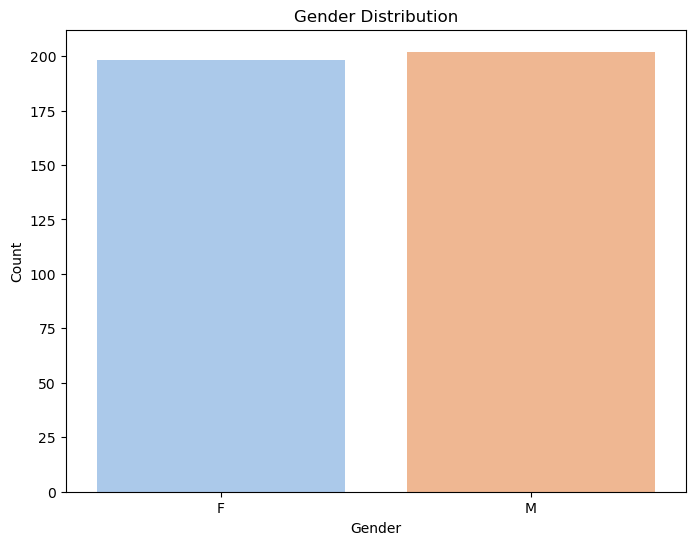

In [71]:
# 4. Count Plot: Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")                                                                                                     
plt.ylabel("Count")
plt.show()

In [79]:

# Check for missing values (optional)
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Gender                0
Experience_(Years)    0
Position              0
Salary                0
dtype: int64


In [81]:
# Encode categorical features
# For Gender: Assuming 'F' and 'M'
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])


In [83]:
# For Position: Encode the job titles
le_position = LabelEncoder()
data['Position'] = le_position.fit_transform(data['Position'])

In [85]:
# --- Define Features and Target ---
X = data.drop('Salary', axis=1)
y = data['Salary']

In [87]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# --- Train the Decision Tree Regressor ---
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [91]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

In [93]:
# Evaluate model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

Mean Squared Error on test set: 1336804003.2479167


In [108]:
import joblib

# Specify the filename for saving the model
model_filename = 'decision_tree_regressor_model.pkl'

# Save the model to disk
joblib.dump(regressor, model_filename)
print(f"Model saved to {model_filename}")


Model saved to decision_tree_regressor_model.pkl
